In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

# Data preparation

In [2]:
DATA_DIR = 'd:/maschineLearning/zoomcamp/CapstoneProject/data/'
MODEL_DIR = 'd:/maschineLearning/zoomcamp/CapstoneProject/models'
SEED = 42 # used to fix random_state

In [3]:
df_train = pd.read_csv(DATA_DIR + '/processed/train.csv', index_col=0)
df_val = pd.read_csv(DATA_DIR + '/processed/val.csv', index_col=0)
df_test = pd.read_csv(DATA_DIR + '/processed/test.csv', index_col=0)

In [4]:
data_train = df_train.copy()
data_val = df_val.copy()
data_test = df_test.copy()

In [5]:
data_test

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
33558,25.0,0.007730,0.530,206800.0,0.896,0.003030,G,0.0833,-5.489,major,0.1370,123.602000,0.243,blues
9427,14.0,0.000015,0.378,284413.0,0.846,0.746000,G#,0.0681,-5.435,minor,0.0609,195.885000,0.527,anime
199,36.0,0.024900,0.865,274013.0,0.650,0.000391,A,0.1020,-8.025,minor,0.1010,120.030000,0.557,electronic
12452,52.0,0.888000,0.642,186080.0,0.139,0.000014,C,0.3380,-14.776,major,0.0306,89.880000,0.332,jazz
39494,64.0,0.005700,0.615,237653.0,0.487,0.002990,B,0.0995,-10.089,minor,0.0269,104.986000,0.323,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28572,61.0,0.081800,0.800,137770.0,0.696,0.000000,F#,0.1210,-5.354,minor,0.3930,159.953000,0.628,rap
25084,71.0,0.317000,0.652,312427.0,0.549,0.000000,F#,0.1040,-7.555,minor,0.0390,120.073000,0.186,rap
18712,49.0,0.000950,0.473,-1.0,0.649,0.000104,C,0.0971,-5.468,major,0.1070,119.952961,0.620,alternative
15205,58.0,0.002160,0.427,200480.0,0.843,0.000000,E,0.1790,-4.540,major,0.0364,147.387000,0.304,alternative


In [5]:
data_train.reset_index(drop=True)
data_val.reset_index(drop=True)
data_test.reset_index(drop=True)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,25.0,0.007730,0.530,206800.0,0.896,0.003030,G,0.0833,-5.489,major,0.1370,123.602000,0.243,blues
1,14.0,0.000015,0.378,284413.0,0.846,0.746000,G#,0.0681,-5.435,minor,0.0609,195.885000,0.527,anime
2,36.0,0.024900,0.865,274013.0,0.650,0.000391,A,0.1020,-8.025,minor,0.1010,120.030000,0.557,electronic
3,52.0,0.888000,0.642,186080.0,0.139,0.000014,C,0.3380,-14.776,major,0.0306,89.880000,0.332,jazz
4,64.0,0.005700,0.615,237653.0,0.487,0.002990,B,0.0995,-10.089,minor,0.0269,104.986000,0.323,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61.0,0.081800,0.800,137770.0,0.696,0.000000,F#,0.1210,-5.354,minor,0.3930,159.953000,0.628,rap
9996,71.0,0.317000,0.652,312427.0,0.549,0.000000,F#,0.1040,-7.555,minor,0.0390,120.073000,0.186,rap
9997,49.0,0.000950,0.473,-1.0,0.649,0.000104,C,0.0971,-5.468,major,0.1070,119.952961,0.620,alternative
9998,58.0,0.002160,0.427,200480.0,0.843,0.000000,E,0.1790,-4.540,major,0.0364,147.387000,0.304,alternative


In [6]:
y_train = data_train['music_genre'].values
y_val = data_val['music_genre'].values
y_test = data_test['music_genre'].values

In [7]:
del data_train['music_genre']
del data_val['music_genre']
del data_test['music_genre']

In [8]:
dv = DictVectorizer(sparse=False)

train_dict = data_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = data_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = data_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [11]:
LE = LabelEncoder()

In [12]:
Y_train = LE.fit_transform(y_train)
Y_val = LE.transform(y_val)
Y_test = LE.transform(y_test)

In [13]:
LE.classes_

array(['alternative', 'anime', 'blues', 'classical', 'country',
       'electronic', 'hip-hop', 'jazz', 'rap', 'rock'], dtype=object)

In [30]:
Y_test

array([2, 1, 5, ..., 0, 0, 1])

In [11]:
features = dv.get_feature_names_out()
features

array(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key=A', 'key=A#', 'key=B', 'key=C', 'key=C#',
       'key=D', 'key=D#', 'key=E', 'key=F', 'key=F#', 'key=G', 'key=G#',
       'liveness', 'loudness', 'mode=major', 'mode=minor', 'popularity',
       'speechiness', 'tempo', 'valence'], dtype=object)

In [12]:
len(features)

25

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(n_estimators=10, random_state=SEED, n_jobs=-10)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-10, random_state=42)

In [32]:
y_pred = rf.predict(X_val)

In [33]:
y_pred

array([3, 3, 0, ..., 0, 4, 0])

In [35]:
Y_val

array([2, 3, 0, ..., 5, 9, 5])

In [52]:
round(rf.score(X_train, Y_train), 4)

0.97

In [37]:
round(rf.score(X_val, Y_val), 4)

0.5074

              precision    recall  f1-score   support

           0       0.33      0.37      0.35       955
           1       0.70      0.75      0.72      1014
           2       0.51      0.48      0.50      1013
           3       0.82      0.81      0.82      1028
           4       0.51      0.52      0.52      1003
           5       0.57      0.53      0.55      1005
           6       0.36      0.39      0.37      1006
           7       0.47      0.42      0.45       999
           8       0.30      0.29      0.30       989
           9       0.47      0.49      0.48       988

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



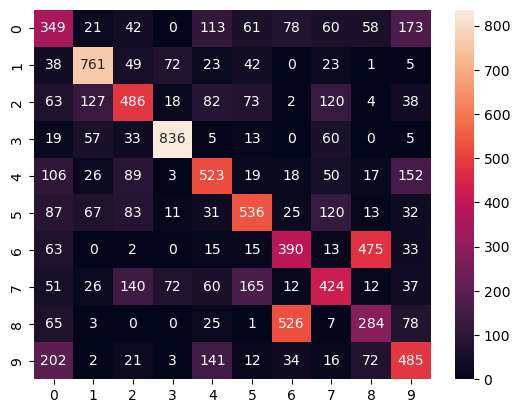

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')#.set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(Y_val,y_pred))

In [45]:
len(rf.feature_importances_)

25

In [50]:
len(dv.feature_names_)

25

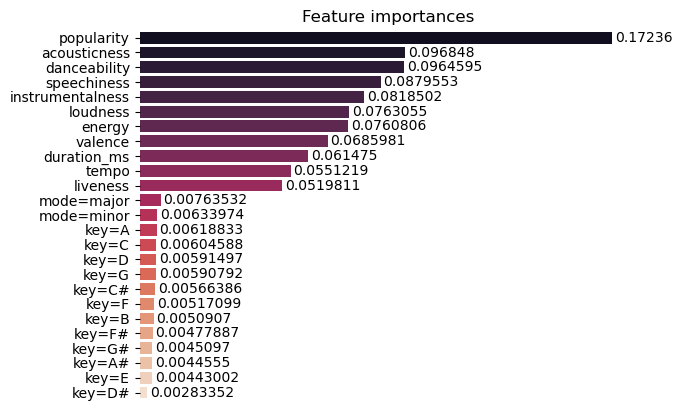

In [51]:
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': features, 'importances': rf.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

# Tuning Random Forest

In [55]:
scores = []

for depth in [10, 15, 20, 25]:
    for s in [1, 3, 5, 10, 50]:
        for n in range(10, 201, 10):
            rf = RandomForestClassifier(n_estimators=n, random_state = SEED, min_samples_leaf=s, max_depth=depth)
            rf.fit(X_train, Y_train)

            #y_pred = rf.predict(X_val)
            score = round(rf.score(X_val, Y_val), 4)
            

            scores.append((n, depth, s, score))

In [57]:
columns = ['n_estimators','max_depth', 'min_samples_leaf', 'score']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores = df_scores.sort_values(by='score', ascending=False).reset_index(drop=True)
df_scores

,n_estimators,max_depth,min_samples_leaf,score
0,70,10,1,0.5779
1,190,15,10,0.5762
2,180,10,10,0.5748
3,190,10,10,0.5745
4,70,15,10,0.5745
...,...,...,...,...
395,10,25,3,0.5384
396,10,15,1,0.5369
397,20,25,1,0.5339
398,10,20,1,0.5188


In [59]:
rf = RandomForestClassifier(n_estimators=df_scores['n_estimators'][0], random_state = SEED, min_samples_leaf=df_scores['min_samples_leaf'][0], max_depth=df_scores['max_depth'][0])
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=70, random_state=42)

# Xgboost

In [17]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

C:\Users\Asus\anaconda3\envs\ml-zoomcamp\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [61]:
dtrain = xgb.DMatrix(X_train, label=Y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=Y_val, feature_names=features)

In [84]:
xgb_cl = xgb.XGBClassifier(seed=SEED)

In [85]:
xgb_cl.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [86]:
preds = xgb_cl.predict(X_val)
accuracy_score(Y_val, preds)

0.5705

# Tuning Xgboost

In [68]:
wachlist = [(X_train, 'train'), (X_val, 'val')]

In [71]:
def parse_xgb_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))
        
    columns = ['num_iter', 'train_accuracy', 'accuracy']
    df_results = pd.DataFrame(results, columns=columns)
    
    return df_results

In [83]:
xgb_cl.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)>

In [70]:
scores = {}

In [ ]:
sample_weight: Optional[Any] = None,
    base_margin: Optional[Any] = None,
    eval_set: Optional[Sequence[Tuple[Any, Any]]] = None,
    eval_metric: Union[str, Sequence[str], Callable[[numpy.ndarray, xgboost.core.DMatrix], Tuple[str, float]], NoneType] = None,
    early_stopping_rounds: Optional[int] = None,
    verbose: Optional[bool] = True,
    xgb_model: Union[xgboost.core.Booster, str, xgboost.sklearn.XGBModel, NoneType] = None,
    sample_weight_eval_set: Optional[Sequence[Any]] = None,
    base_margin_eval_set: Optional[Sequence[Any]] = None,
    feature_weights:

In [91]:
#%%capture output

xgb_params = {
    'learning_rate' : 0.1,
    'n_estimators' : 1000
}

model = xgb.XGBClassifier(max_depth = 10 ,seed = SEED)

In [92]:
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [93]:
preds = model.predict(X_val)
accuracy_score(Y_val, preds)

0.5558

In [100]:
scores = []

for depth in [10, 15, 20, 25]:
    for s in [1, 3, 5, 10]:
        for n in range(10, 201, 10):
            model = xgb.XGBClassifier(n_estimators=n, random_state = SEED, num_parallel_tree=s, max_depth=depth)
            model.fit(X_train, Y_train)

            preds = model.predict(X_val)
            score = round(accuracy_score(Y_val, preds), 4)

            scores.append((n, depth, s, score))

KeyboardInterrupt: 

In [97]:
columns = ['n_estimators','max_depth', 'num_parallel_tree', 'score']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores = df_scores.sort_values(by='score', ascending=False).reset_index(drop=True)
df_scores

ValueError: 4 columns passed, passed data had 2 columns

# KNeighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
kNN = KNeighborsClassifier(n_neighbors=5) 
kNN.fit(X_train, Y_train) 
predict_val = kNN.predict(X_val)

In [18]:
predict_test = kNN.predict(X_test)
accuracy_score(Y_test, predict_test)

0.1726

In [19]:
predict_val

array([0, 0, 0, ..., 8, 0, 1])

In [20]:
Y_val

array([2, 3, 0, ..., 5, 9, 5])

In [21]:
accuracy_score(Y_val, predict_val)

0.1728

In [22]:
scores = []

for n in range(1, 100):
    kNN = KNeighborsClassifier(n_neighbors=n) 
    kNN.fit(X_train, Y_train) 

    y_pred = kNN.predict(X_val)
    score = round(accuracy_score(Y_val, y_pred), 4)
            

    scores.append((n, score))

In [23]:
columns = ['n_neighbors', 'score']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores = df_scores.sort_values(by='score', ascending=False).reset_index(drop=True)
df_scores

,n_neighbors,score
0,1,0.1781
1,6,0.1760
2,93,0.1742
3,94,0.1737
4,92,0.1734
...,...,...
94,48,0.1661
95,49,0.1653
96,30,0.1652
97,25,0.1651


# Selecting the final model

the best model is XgbostClassifier

In [125]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop = True)

In [128]:
df_full_train

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,58.0,0.09150,0.742,219802.0,0.6890,0.000000,A#,0.0768,-5.812,minor,0.2810,121.982000,0.2070,rap
1,37.0,0.98000,0.691,176627.0,0.0958,0.000016,C#,0.0931,-13.900,minor,0.1430,101.574000,0.5190,blues
2,51.0,0.54900,0.680,230540.0,0.2410,0.000025,F#,0.2220,-11.448,minor,0.2470,127.908000,0.2110,alternative
3,36.0,0.90300,0.636,141120.0,0.3900,0.000004,E,0.1600,-10.068,major,0.0280,102.091000,0.4720,country
4,53.0,0.00783,0.612,161160.0,0.7940,0.000002,D,0.4160,-4.570,major,0.0424,115.936000,0.8060,country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,51.0,0.00430,0.585,-1.0,0.9280,0.000000,F,0.2750,-4.939,major,0.0607,104.007000,0.5470,rap
39996,54.0,0.00354,0.749,242880.0,0.9090,0.000000,G#,0.3370,-2.808,major,0.0740,149.988000,0.3930,rap
39997,49.0,0.00305,0.454,223148.0,0.6350,0.000000,G,0.3010,-6.218,minor,0.0292,142.040000,0.1570,electronic
39998,65.0,0.56900,0.355,266920.0,0.4780,0.000003,C,0.1940,-8.323,major,0.0335,102.971000,0.2690,rock


In [129]:
y_full_train = df_full_train['music_genre'].values

In [130]:
del df_full_train['music_genre']

In [131]:
df_full_train_dict = df_full_train.to_dict(orient='records')
X_full_train = dv.transform(df_full_train_dict)

In [136]:
LE = LabelEncoder()

In [141]:
Y_full_train = LE.fit_transform(y_full_train)

In [151]:
model = xgb.XGBClassifier(seed=SEED)

In [152]:
model.fit(X_full_train, Y_full_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [153]:
y_pred_test =  model.predict(X_test)

In [154]:
accuracy_score(Y_test, y_pred_test)

0.5714

# Save model

In [155]:
import pickle

In [156]:
output_file = 'XgboostClassifier.bin'

In [157]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, LE, model), f_out)